In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_table = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')

In [3]:
def normalization(matrix, vector):
    #Mean calculation
    mVector = np.mean(vector, axis=0)
    mMatrix = np.mean(matrix, axis=0)
    
    #Subtraction of the mean
    vector = vector - mVector
    matrix = matrix - mMatrix
    
    #Standard deviation
    stdVector = np.std(vector, axis = 0)
    stdMatrix = np.std(matrix, axis = 0)
    
    #Normalization of data
    vector = np.divide(vector, stdVector)
    matrix = np.divide(matrix, stdMatrix)
    
    return matrix, vector

In [4]:
X0 = np.ones((len(data_table),1))
xMatrix = data_table[['Peso', 'Altura']].values
yVector = data_table['Cateter'].values

In [5]:
xMatrix, yVector = normalization(xMatrix, yVector)

In [6]:
xMatrixN = np.hstack((X0,xMatrix))

In [7]:
def gradientDescent(xMatrix, yVector, nEpochs, alpha):
    initialW = np.ones(len(xMatrix[0]), dtype = float);
    cost = []
    yHat = xMatrix.dot(initialW)    
    for i in range(nEpochs):
        summation = 0;
        for y, y_c, x in zip(yVector, yHat, xMatrix):
            summation += (y - y_c) * x
        cost.append(-((1/len(xMatrix)) * summation))
        
        nextW =  initialW + alpha*((1/len(xMatrix)) * summation)
        yHat = xMatrix.dot(nextW)
        initialW = nextW
    return nextW, cost

In [8]:
nextW, cost = gradientDescent(xMatrixN, yVector, 10000, 0.001)

In [9]:
t = np.arange(0., 10000., 1.)
costColumns = [sub[0] for sub in cost] 

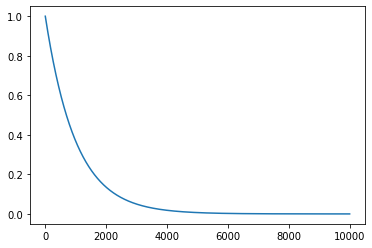

In [10]:
plt.plot(t, costColumns)
